Training model...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished


Training completed in 67.17 seconds


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.86    394179
           1       0.11      0.83      0.19     13794

    accuracy                           0.77    407973
   macro avg       0.55      0.80      0.53    407973
weighted avg       0.96      0.77      0.84    407973



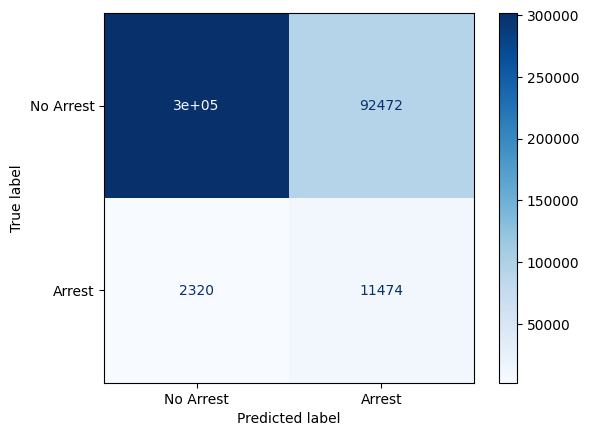

In [1]:
import time
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load data and preprocessor
X_train = joblib.load('X_train_audit.pkl')
X_test = joblib.load('X_test_audit.pkl')
y_train = joblib.load('y_train_audit.pkl')
y_test = joblib.load('y_test_audit.pkl')
preprocessor = joblib.load('preprocessor_audit.pkl')

# Build model pipeline with balanced class weights
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=100,       
        max_depth=10,
        min_samples_leaf=20,
        class_weight='balanced',
        n_jobs=4,
        verbose=1
    ))
])

# Train the model with timing
print("Training model...")
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"Training completed in {end - start:.2f} seconds")

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Arrest', 'Arrest'], cmap='Blues')
